In [1]:
import numpy as np
import qutip
from qze.dimer import get_sim_list
import matplotlib.pyplot as plt

In [2]:
# Statistics
ntraj = 10**3

# Physical parameters.
Nl1 = 16
Nl2 = 31
l1s = np.linspace(0, 1.5, Nl1)
l2s = np.linspace(0, 3, Nl2)
lambdas = [[l1, l2] for l1 in l1s for l2 in l2s]

T = 20
dt = .01
omega_S = 1

t_eval = np.array([0, T])

# solver = "trsolve"
solver = "mcsolve"
# solver = "gutzwiller"

# store_states = False
# compute_eentropy = False
# compute_fidelity = False

no_click = False

psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))

In [3]:
sim_list = get_sim_list(lambdas,
                        omega_S,
                        psi0,
                        t_eval,
                        ntraj,
                        dt,
                        solver,
                        no_click)

lmbd_1_list = l1s
lmbd_2_list = l2s

In [4]:
data = []

for sim in sim_list:
    f = open(f"data/{str(sim)}.npz", "rb")
    data.append(np.load(f))
    # f.close()

In [5]:
def idx(a, lmbd):
    return np.argmin(np.abs(np.array(a)-lmbd))

In [6]:
eoe_heatmap = np.zeros( (Nl1, Nl2) )
fid_heatmap = np.zeros( (Nl1, Nl2) )

for i, sim in enumerate(sim_list):
    x = idx(lmbd_2_list, sim.lmbd_2)
    y = idx(lmbd_1_list, sim.lmbd_1)

    eoe_heatmap[y, x] = data[i]['entropy_of_entanglement'].mean()
    fid_heatmap[y, x] = data[i]['fidelity'].mean()

## Fidelity and entanglement entropy

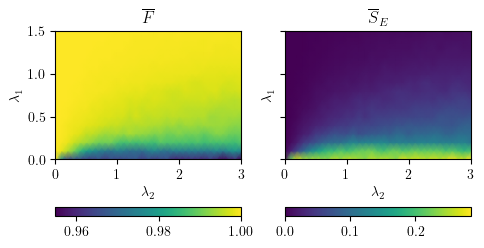

In [7]:
## Fidelity and entanglement entropy
# from cmcrameri import cm
# import cmasher as cmr
# import colorcet as cc

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x2.mplstyle"])

ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)

fig, axs = plt.subplots(1, 2,
                        sharey=True,
                        layout='constrained')

pcm = axs[0].pcolormesh(l2s, l1s, fid_heatmap,
                        shading='gouraud',
                        norm='linear')

axs[0].set_yticks(ylim)

axs[0].set_xlabel(r'$\lambda_2$')
axs[0].set_ylabel(r'$\lambda_1$')
axs[0].set_xticks(xticks)
axs[0].set_yticks(yticks)
axs[0].set_title(r'$\overline{F}$')
fig.colorbar(pcm, ax=axs[0], location='bottom')

pcm = axs[1].pcolormesh(l2s, l1s, eoe_heatmap,
                        shading='gouraud',
                        norm='linear')

axs[0].set_ylim(ylim)

axs[1].set_xlabel(r'$\lambda_2$')
axs[1].set_ylabel(r'$\lambda_1$')
axs[1].set_xticks(xticks)
axs[1].set_yticks(yticks)
axs[1].set_title(r'$\overline{S}_E$')
fig.colorbar(pcm, ax=axs[1], location='bottom')

plt.savefig('plots/dimer/dimer-full-fidelity-eentorpy.pdf')

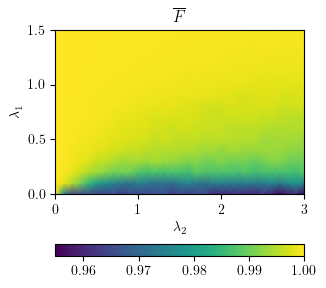

In [8]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)

fig, axs = plt.subplots(1, 1,
                        layout='constrained')

pcm = axs.pcolormesh(l2s, l1s, fid_heatmap,
                        shading='gouraud',
                        norm='linear')

axs.set_yticks(ylim)

axs.set_xlabel(r'$\lambda_2$')
axs.set_ylabel(r'$\lambda_1$')
axs.set_xticks(xticks)
axs.set_yticks(yticks)
axs.set_title(r'$\overline{F}$')
fig.colorbar(pcm, ax=axs, location='bottom')

fig.set_figheight(7/2.54)

plt.savefig('plots/dimer/dimer-full-fidelity.pdf')

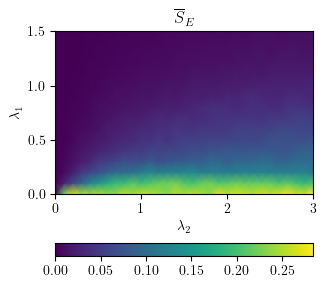

In [9]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)

fig, axs = plt.subplots(1, 1,
                        layout='constrained')
pcm = axs.pcolormesh(l2s, l1s, eoe_heatmap,
                        shading='gouraud',
                        norm='linear')

axs.set_ylim(ylim)

axs.set_xlabel(r'$\lambda_2$')
axs.set_ylabel(r'$\lambda_1$')
axs.set_xticks(xticks)
axs.set_yticks(yticks)
axs.set_title(r'$\overline{S}_E$')
fig.colorbar(pcm, ax=axs, location='bottom')

fig.set_figheight(7/2.54)

plt.savefig('plots/dimer/dimer-full-eentorpy.pdf')

# Paper

In [10]:
from qze.dimer_gutz_mc import DimerGutzMCParameters
from qze.dimer import DimerParameters, get_c_ops, get_H_S

In [11]:
lambdas = [[.25, .25],
           [.25, 1.75],
           [1.25, .25]]

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]

bins_lr = 36

In [12]:
# Number of simulations with the same parameters.
Nsim = 5

# Simulation parameters.
nwalk = int(2 * 10**7)

# lambdas = [[.25, .25],
#            [.25, 1.75],
#            [1.25, .25]]

T = 20
dt = .01
omega_S = 1
walk_pos0 = np.array(nwalk * [[np.pi, np.pi]])
# walk_pos0 = None


# Data loading
hist_gutz = []
hist_gutz_lr = []

for (lmbd_1, lmbd_2) in lambdas:
    walk_pos = []
    for simid in range(Nsim):
        sim = DimerGutzMCParameters(omega_S,
                                    lmbd_1,
                                    lmbd_2,
                                    walk_pos0,
                                    dt,
                                    T,
                                    nwalk,
                                    simid)
        # f = open(f"data/{str(sim)}.pkl", "rb")
        # data = load(f)
        # f.close()
        # walk_pos.append(data[1])
        f = open(f"data/{str(sim)}.npz", "rb")
        data = np.load(f)
        walk_pos.append(data['walk_pos'])

    walk_pos = np.array(walk_pos)
    walk_pos = np.concatenate(walk_pos, axis=0)    

    h, edges_l, edges_r = np.histogram2d(walk_pos[:, 0],
                                         walk_pos[:, 1],
                                         bins=bins,
                                         range=binning_range,
                                         density=True)
    
    h_lr, edges_l_lr, edges_r_lr = np.histogram2d(walk_pos[:, 0],
                                                  walk_pos[:, 1],
                                                  bins=bins_lr,
                                                  range=binning_range,
                                                  density=True)
    
    hist_gutz.append(h)
    hist_gutz_lr.append(h_lr)

In [13]:
# Number of simulations with the same parameters.
nsim = 4

# Statistics
ntraj = int(2.5 * 10**5)

# Physical parameters.
# lambdas = [[.25, 1.75]]
# lambdas = [[.25, .25],
#            [.25, 1.75],
#            [1.25, .25]]

T = 20
dt = .01
omega_S = 1

t_eval = np.array([0, T])

# solver = "trsolve"
solver = "mcsolve"
# solver = "gutzwiller"

store_states = False
compute_eentropy = False
compute_fidelity = False

no_click = False

psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))


# Data loading
hist_full = []
hist_full_lr = []


for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    tl = []
    tr = []

    # Sketcy solution to make up for inhomogeneous data.
    if i == 1:
        nsim = 40
    else:
        nsim = 4

    for simid in range(nsim):
        sim = DimerParameters(omega_S,
                              lmbd_1,
                              lmbd_2,
                              get_H_S(omega_S),
                              get_c_ops(lmbd_1, lmbd_2, omega_S),
                              psi0,
                              t_eval,
                              ntraj,
                              solver,
                              dt,
                              no_click,
                              simid)
        # f = open(f"data/{str(sim)}.pkl", "rb")
        # data = load(f)
        # f.close()
        # walk_pos.append(data[1])
        f = open(f"data/{str(sim)}.npz", "rb")
        data = np.load(f)
        tl.append(data['bloch_coords'][:-1,0,1])
        tr.append(data['bloch_coords'][:-1,1,1])
        # walk_pos.append(data['walk_pos'])

    tl = np.array(tl)
    tr = np.array(tr)
    tl = np.concatenate(tl, axis=0)
    tr = np.concatenate(tr, axis=0)


    h, edges_l, edges_r = np.histogram2d(tl,
                                         tr,
                                         bins=bins,
                                         range=binning_range,
                                         density=True)
    
    h_lr, edges_l_lr, edges_r_lr = np.histogram2d(tl,
                                                  tr,
                                                  bins=bins_lr,
                                                  range=binning_range,
                                                  density=True)
    

    hist_full.append(h)
    hist_full_lr.append(h_lr)

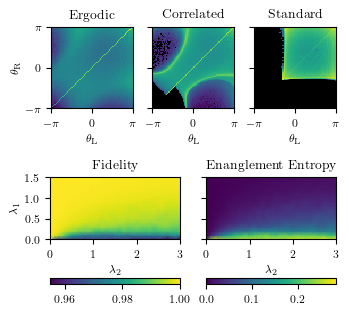

In [ ]:
plt.style.use(["./config/stylelib/paper_aps_base.mplstyle",
               "./config/stylelib/paper_aps_single_column.mplstyle"])


fig = plt.figure(layout='constrained')
# fig = plt.figure()

subfigs = fig.subfigures(2, 1,
                         hspace=0.05)

axs_stden = subfigs[0].subplots(1, 3,
                                sharey=True,
                                )

# plt.subplots_adjust(wspace=.05)

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]
titles = [r'Ergodic', r'Correlated', r'Standard']

for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    
    hist_comp = np.zeros_like(hist_full[0])
    for j in np.arange(len(hist_comp)):
        hist_comp[j, j] = hist_full[i][j, j]
        for k in np.arange(j+1, len(hist_comp[j]), 1):
            hist_comp[k, j] = (hist_full[i][j, k] + hist_full[i][k, j]) / 2
            hist_comp[j, k] = (hist_gutz[i][j, k] + hist_gutz[i][k, j]) / 2

    pcm = axs_stden[i].pcolormesh(edges_l, edges_r, hist_comp,
                      norm="log",
                      vmin=hist_gutz[i][np.nonzero(hist_gutz[i])].min(),
                      vmax=hist_gutz[i].max())

    axs_stden[i].set_xticks(ticks)
    axs_stden[i].set_xticklabels(tick_labels)
    axs_stden[i].set_yticks(ticks)
    axs_stden[i].set_yticklabels(tick_labels)
    axs_stden[i].set_title(titles[i])
    # axs_stden[i].set_title(f'({(i+1) * "I"})\n'
    #                  rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs_stden[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs_stden[i].set(aspect='equal')
    axs_stden[i].set_facecolor('k')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs_stden.flat:
    ax.label_outer()



ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)


axs_fidee = subfigs[1].subplots(1, 2,
                                sharey=True)

pcm = axs_fidee[0].pcolormesh(l2s, l1s, fid_heatmap,
                              shading='gouraud',
                              norm='linear')

axs_fidee[0].set_yticks(ylim)

axs_fidee[0].set_xlabel(r'$\lambda_2$')
axs_fidee[0].set_ylabel(r'$\lambda_1$')
axs_fidee[0].set_xticks(xticks)
axs_fidee[0].set_yticks(yticks)
axs_fidee[0].set_title(r'Fidelity')
# axs_fidee[0].set_title(r'$\overline{F}$')
fig.colorbar(pcm, ax=axs_fidee[0], location='bottom')

pcm = axs_fidee[1].pcolormesh(l2s, l1s, eoe_heatmap,
                              shading='gouraud',
                              norm='linear')

axs_fidee[0].set_ylim(ylim)

axs_fidee[1].set_xlabel(r'$\lambda_2$')
axs_fidee[1].set_ylabel(r'$\lambda_1$')
axs_fidee[1].set_xticks(xticks)
axs_fidee[1].set_yticks(yticks)
axs_fidee[1].set_title(r'Enanglement Entropy')
# axs_fidee[1].set_title(r'$\overline{S}_E$')
fig.colorbar(pcm, ax=axs_fidee[1], location='bottom')

for ax in axs_fidee.flat:
    ax.label_outer()

fig.set_figheight(3.125)

# subfigs[0].subplots_adjust(top=.2)

plt.savefig('plots/dimer/paper/dimer-gutz-vs-full.pdf')

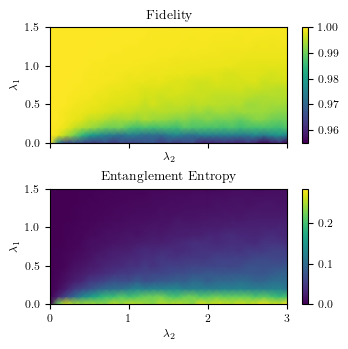

In [15]:
plt.style.use(["./config/stylelib/paper_aps_base.mplstyle",
               "./config/stylelib/paper_aps_single_column.mplstyle"])

ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)

fig, axs = plt.subplots(2, 1,
                        sharex=True,
                        layout='constrained')

pcm = axs[0].pcolormesh(l2s, l1s, fid_heatmap,
                        shading='gouraud',
                        norm='linear')

axs[0].set_yticks(ylim)

axs[0].set_xlabel(r'$\lambda_2$')
axs[0].set_ylabel(r'$\lambda_1$')
axs[0].set_xticks(xticks)
axs[0].set_yticks(yticks)
axs[0].set_title(r'Fidelity')
fig.colorbar(pcm, ax=axs[0], location='right')

pcm = axs[1].pcolormesh(l2s, l1s, eoe_heatmap,
                        shading='gouraud',
                        norm='linear')

axs[0].set_ylim(ylim)

axs[1].set_xlabel(r'$\lambda_2$')
axs[1].set_ylabel(r'$\lambda_1$')
axs[1].set_xticks(xticks)
axs[1].set_yticks(yticks)
axs[1].set_title(r'Entanglement Entropy')
fig.colorbar(pcm, ax=axs[1], location='right')

# plt.savefig('plots/dimer/dimer-full-fidelity-eentorpy.pdf')

/tmp/ipykernel_16271/2676879541.py:89: UserWarning: Adding colorbar to a different Figure <Figure size 337.5x325 with 19 Axes> than <Figure size 337.5x337.5 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(pcm, ax=axs_fidee[0], location='bottom')
/tmp/ipykernel_16271/2676879541.py:103: UserWarning: Adding colorbar to a different Figure <Figure size 337.5x325 with 20 Axes> than <Figure size 337.5x337.5 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(pcm, ax=axs_fidee[1], location='bottom')


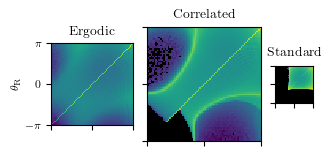

In [20]:
plt.style.use(["./config/stylelib/paper_aps_base.mplstyle",
               "./config/stylelib/paper_aps_single_column.mplstyle"])


# fig = plt.figure(layout='constrained')
fig = plt.figure()

# subfigs = fig.subfigures(2, 1,
#                          hspace=0.05)

gs = fig.add_gridspec(2, 6)
axs_stden = [fig.add_subplot(gs[0, 0:2]),
             fig.add_subplot(gs[0, 2:5]),
             fig.add_subplot(gs[0, 5:7])]

# axs_stden = subfigs[0].subplots(1, 3,
#                                 sharey=True)

# plt.subplots_adjust(wspace=.05)

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]
titles = [r'Ergodic', r'Correlated', r'Standard']

for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    
    hist_comp = np.zeros_like(hist_full[0])
    for j in np.arange(len(hist_comp)):
        hist_comp[j, j] = hist_full[i][j, j]
        for k in np.arange(j+1, len(hist_comp[j]), 1):
            hist_comp[k, j] = (hist_full[i][j, k] + hist_full[i][k, j]) / 2
            hist_comp[j, k] = (hist_gutz[i][j, k] + hist_gutz[i][k, j]) / 2

    pcm = axs_stden[i].pcolormesh(edges_l, edges_r, hist_comp,
                      norm="log",
                      vmin=hist_gutz[i][np.nonzero(hist_gutz[i])].min(),
                      vmax=hist_gutz[i].max())

    # centers_l = (edges_l[1:] + edges_l[:-1]) / 2
    # centers_r = (edges_r[1:] + edges_r[:-1]) / 2   
    # axs[i].pcolormesh(centers_l, centers_r, hist_comp,
    #                   norm="log",
    #                   vmin=hist_gutz[np.nonzero(hist_gutz)].min(),
    #                   vmax=hist_gutz.max(),
    #                   shading='gouraud')

    # fig.colorbar(pcm, ax=axs_stden[i], location='bottom')

    axs_stden[i].set_xticks(ticks)
    axs_stden[i].set_xticklabels(tick_labels)
    axs_stden[i].set_yticks(ticks)
    axs_stden[i].set_yticklabels(tick_labels)
    axs_stden[i].set_title(titles[i])
    # axs_stden[i].set_title(f'({(i+1) * "I"})\n'
    #                  rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs_stden[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs_stden[i].set(aspect='equal')
    axs_stden[i].set_facecolor('k')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs_stden:
    ax.label_outer()



ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)


# axs_fidee = subfigs[1].subplots(1, 2,
#                                 sharey=True)

pcm = axs_fidee[0].pcolormesh(l2s, l1s, fid_heatmap,
                              shading='gouraud',
                              norm='linear')

axs_fidee[0].set_yticks(ylim)

axs_fidee[0].set_xlabel(r'$\lambda_2$')
axs_fidee[0].set_ylabel(r'$\lambda_1$')
axs_fidee[0].set_xticks(xticks)
axs_fidee[0].set_yticks(yticks)
axs_fidee[0].set_title(r'Fidelity')
# axs_fidee[0].set_title(r'$\overline{F}$')
fig.colorbar(pcm, ax=axs_fidee[0], location='bottom')

pcm = axs_fidee[1].pcolormesh(l2s, l1s, eoe_heatmap,
                              shading='gouraud',
                              norm='linear')

axs_fidee[0].set_ylim(ylim)

axs_fidee[1].set_xlabel(r'$\lambda_2$')
axs_fidee[1].set_ylabel(r'$\lambda_1$')
axs_fidee[1].set_xticks(xticks)
axs_fidee[1].set_yticks(yticks)
axs_fidee[1].set_title(r'Enanglement Entropy')
# axs_fidee[1].set_title(r'$\overline{S}_E$')
fig.colorbar(pcm, ax=axs_fidee[1], location='bottom')

for ax in axs_fidee.flat:
    ax.label_outer()

fig.set_figheight(3.25)

# subfigs[0].subplots_adjust(top=.2)

plt.savefig('plots/dimer/paper/dimer-gutz-vs-full.pdf',
            bbox_inches='tight')